In [8]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def cumulative(a):
    final = np.zeros (len(a))
    sum = 0
    for i in range(len(a)):
        final[i] = a[i] + sum
        sum += a[i]
    return final

In [14]:
db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
# db_file = '/home/andrei2/Desktop/git/saltproc/test_data/tap/hardcoded/1/db_2187d.h5'

step = 3/365  # days

db = tb.open_file(db_file, mode='r')
# print(db)

sim_param = db.root.materials.fuel.before_reproc.parameters
# Keff at t=0 depletion step
burnup = np.array([x['burnup'] for x in sim_param.iterrows()])
# burnup_err = np.array([x['burnup'][1] for x in sim_param.iterrows()])
# Keff at t=end depletion step
days = np.array(step*np.arange(len(burnup)))

db.close()

# print(burnup)
# print(cumulative(burnup))

<IPython.core.display.Javascript object>


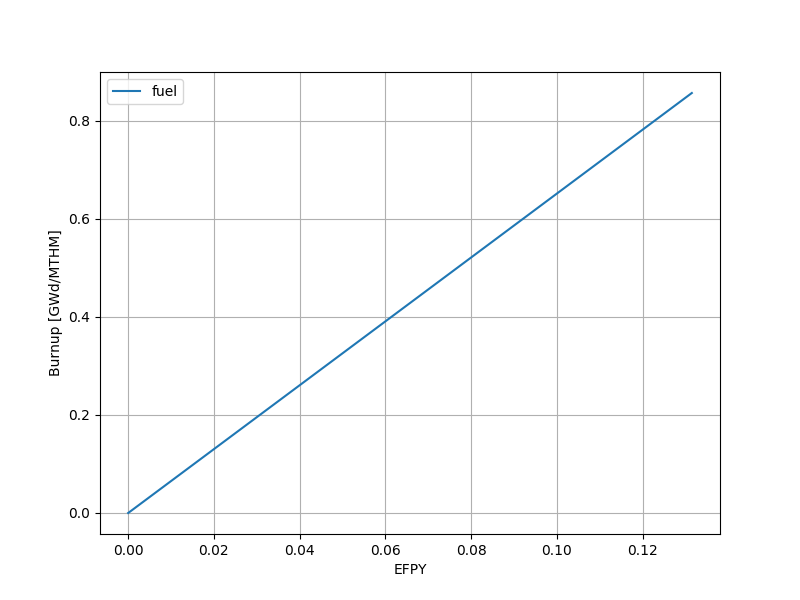

In [15]:
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax = fig_keff_1.add_subplot(111)
ax.grid(True)
ax.plot(days, cumulative(burnup), '-', label='fuel', linewidth=1.5)

ax.legend(loc=0)
ax.set_ylabel('Burnup [GWd/MTHM]')
#ax.set_xlabel('EFPD')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
#ax.set_ylim([1.05, 1.06])
fig_keff_1.show()
